<a href="https://colab.research.google.com/github/kiera-dev/ACNH_Colab_SQL/blob/main/ACNH_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install duckdb

In [75]:
import duckdb, os
import pandas as pd

acnh_villagers_csv_path = "/content/drive/MyDrive/acnh_data/villagers.csv"

if os.path.exists(acnh_villagers_csv_path):
  print(f"Loading: {acnh_villagers_csv_path}")
  villagers_acnh_df = pd.read_csv(acnh_villagers_csv_path)
else:
  print(f"Derp")

villagers_acnh_df

Loading: /content/drive/MyDrive/acnh_data/villagers.csv


,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Winnie,Horse,Female,Peppy,Fashion,31-Jan,hay-OK,K.K. Country,Cool,Simple,White,Gray,backyard-fence wall,backyard lawn,1626;1626;5970;4003;3509;1620;1627;3467;1631;1...,hrs05,b4HwfyvThyipScSAv
387,Wolfgang,Wolf,Male,Cranky,Education,25-Nov,snarrrl,K.K. D&B,Cool,Active,Black,Green,dark wooden-mosaic wall,stripe flooring,4117;7323;7323;3275;4109;3270;3196;4338;3200;3...,wol02,RbF2wcn6jRxtgLDRd
388,Yuka,Koala,Female,Snooty,Fashion,20-Jul,tsk tsk,Soulful K.K.,Cool,Elegant,Orange,Yellow,beige art-deco wall,simple purple flooring,3957;3955;2554;3974;3951;794;4106;3959;3958;997,kal00,QDcxk3dCNT6yeD9hk
389,Zell,Deer,Male,Smug,Music,7-Jun,pronk,K.K. Swing,Cool,Gorgeous,Purple,Gray,cityscape wall,monochromatic tile flooring,1875;863;4129;4053;4053;3951;794;3775;4046;423...,der02,LodBWtdMRZbjFNga9


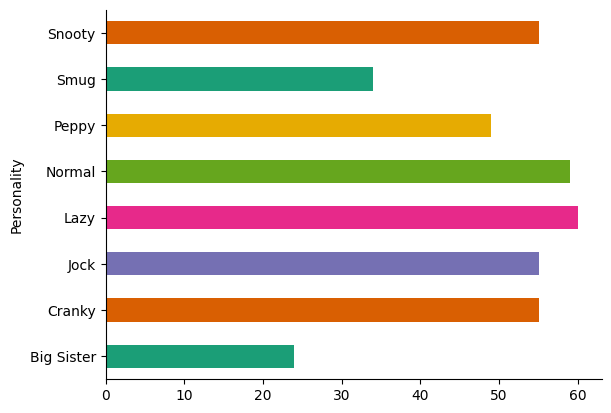

In [76]:
from matplotlib import pyplot as plt
import seaborn as sns
villagers_acnh_df.groupby('Personality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [77]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_acnh_df WHERE species = 'Cat'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha    │ Female  │ Cat     │ Snooty      │ me meow     │
│ Bob      │ Male    │ Cat     │ Lazy        │ pthhpth     │
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Kabuki   │ Male    │ Cat     │ Cranky      │ meooo-OH    │
│ Katt     │ Female  │ Cat     │ Big Sister  │ purrty      │
│ Kid Cat  │ Male    │ Cat     │ Jock        │ psst        │
│ Kiki     │ Female  │ Cat     │ Normal      │ kitty cat   │
│ Kitty    │ Female  │ Cat     │ Snooty      │ mrowrr      │
│ Lolly    │ Female  │ Cat     │ Normal      │ bonbon      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Mitzi    │ Female  │ Cat     │ Normal      │ mew         │
│ Moe      │ Male    │ Cat     │ Lazy        │ myawn       │
│ Monique  │ Female  │ C

In [78]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_acnh_df WHERE species = 'Cat' AND personality = 'Peppy'")

┌──────────┬─────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Felicity │ Female  │ Cat     │ Peppy       │ mimimi      │
│ Merry    │ Female  │ Cat     │ Peppy       │ mweee       │
│ Rosie    │ Female  │ Cat     │ Peppy       │ silly       │
│ Tabby    │ Female  │ Cat     │ Peppy       │ me-WOW      │
│ Tangy    │ Female  │ Cat     │ Peppy       │ reeeeOWR    │
└──────────┴─────────┴─────────┴─────────────┴─────────────┘

In [79]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_acnh_df WHERE species = 'Cat' AND name LIKE 'A%'")

┌─────────┬─────────┬─────────┬─────────────┬─────────────┐
│  Name   │ Gender  │ Species │ Personality │ Catchphrase │
│ varchar │ varchar │ varchar │   varchar   │   varchar   │
├─────────┼─────────┼─────────┼─────────────┼─────────────┤
│ Ankha   │ Female  │ Cat     │ Snooty      │ me meow     │
└─────────┴─────────┴─────────┴─────────────┴─────────────┘

In [80]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count FROM villagers_acnh_df GROUP BY personality")

┌─────────────┬───────────────────┐
│ Personality │ personality_count │
│   varchar   │       int64       │
├─────────────┼───────────────────┤
│ Cranky      │                55 │
│ Peppy       │                49 │
│ Big Sister  │                24 │
│ Lazy        │                60 │
│ Normal      │                59 │
│ Snooty      │                55 │
│ Smug        │                34 │
│ Jock        │                55 │
└─────────────┴───────────────────┘

In [81]:
duckdb.sql("SELECT personality, COUNT(*) AS personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_acnh_df ) AS personality_percentage FROM acnh_df GROUP BY personality ORDER BY personality_count ASC")

┌─────────────┬───────────────────┬────────────────────────┐
│ Personality │ personality_count │ personality_percentage │
│   varchar   │       int64       │         double         │
├─────────────┼───────────────────┼────────────────────────┤
│ Big Sister  │                24 │      6.138107416879795 │
│ Smug        │                34 │      8.695652173913043 │
│ Peppy       │                49 │     12.531969309462916 │
│ Cranky      │                55 │     14.066496163682864 │
│ Snooty      │                55 │     14.066496163682864 │
│ Jock        │                55 │     14.066496163682864 │
│ Normal      │                59 │     15.089514066496164 │
│ Lazy        │                60 │     15.345268542199488 │
└─────────────┴───────────────────┴────────────────────────┘

In [82]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_acnh_df ) AS cranky_percentage FROM acnh_df WHERE personality = 'Cranky'")

┌────────────────────┐
│ cranky_percentage  │
│       double       │
├────────────────────┤
│ 14.066496163682864 │
└────────────────────┘

In [83]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_acnh_df WHERE species = 'Cat') AS cat_cranky_percentage FROM acnh_df WHERE species = 'Cat' AND personality = 'Cranky'")

┌───────────────────────┐
│ cat_cranky_percentage │
│        double         │
├───────────────────────┤
│     8.695652173913043 │
└───────────────────────┘

In [84]:
duckdb.sql("SELECT personality, COUNT(*) AS cat_personality_count, COUNT(*) * 100.0 / (SELECT COUNT(personality) FROM villagers_acnh_df WHERE species = 'Cat') AS cat_personality_percentage FROM villagers_acnh_df WHERE species = 'Cat' GROUP BY personality ORDER BY cat_personality_count ASC")

┌─────────────┬───────────────────────┬────────────────────────────┐
│ Personality │ cat_personality_count │ cat_personality_percentage │
│   varchar   │         int64         │           double           │
├─────────────┼───────────────────────┼────────────────────────────┤
│ Big Sister  │                     1 │         4.3478260869565215 │
│ Smug        │                     1 │         4.3478260869565215 │
│ Cranky      │                     2 │          8.695652173913043 │
│ Lazy        │                     3 │         13.043478260869565 │
│ Normal      │                     3 │         13.043478260869565 │
│ Jock        │                     3 │         13.043478260869565 │
│ Snooty      │                     5 │          21.73913043478261 │
│ Peppy       │                     5 │          21.73913043478261 │
└─────────────┴───────────────────────┴────────────────────────────┘

In [85]:
duckdb.sql("SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM villagers_acnh_df ) AS alligator_percentage FROM villagers_acnh_df WHERE species = 'Alligator'")

┌──────────────────────┐
│ alligator_percentage │
│        double        │
├──────────────────────┤
│   1.7902813299232736 │
└──────────────────────┘

In [86]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase FROM villagers_acnh_df WHERE species = 'Alligator'")

┌─────────┬─────────┬───────────┬─────────────┬─────────────┐
│  Name   │ Gender  │  Species  │ Personality │ Catchphrase │
│ varchar │ varchar │  varchar  │   varchar   │   varchar   │
├─────────┼─────────┼───────────┼─────────────┼─────────────┤
│ Alfonso │ Male    │ Alligator │ Lazy        │ it'sa me    │
│ Alli    │ Female  │ Alligator │ Snooty      │ graaagh     │
│ Boots   │ Male    │ Alligator │ Jock        │ munchie     │
│ Del     │ Male    │ Alligator │ Cranky      │ gronk       │
│ Drago   │ Male    │ Alligator │ Lazy        │ burrrn      │
│ Gayle   │ Female  │ Alligator │ Normal      │ snacky      │
│ Sly     │ Male    │ Alligator │ Jock        │ hoo-rah     │
└─────────┴─────────┴───────────┴─────────────┴─────────────┘

In [87]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_acnh_df ORDER BY species DESC")

┌──────────┬───────────┬─────────────┬─────────────┐
│   Name   │  Species  │ Personality │ Catchphrase │
│ varchar  │  varchar  │   varchar   │   varchar   │
├──────────┼───────────┼─────────────┼─────────────┤
│ Fang     │ Wolf      │ Cranky      │ cha-chomp   │
│ Chief    │ Wolf      │ Cranky      │ harrumph    │
│ Wolfgang │ Wolf      │ Cranky      │ snarrrl     │
│ Lobo     │ Wolf      │ Cranky      │ ah-rooooo   │
│ Whitney  │ Wolf      │ Snooty      │ snappy      │
│ Vivian   │ Wolf      │ Snooty      │ piffle      │
│ Kyle     │ Wolf      │ Smug        │ alpha       │
│ Dobie    │ Wolf      │ Cranky      │ ohmmm       │
│ Audie    │ Wolf      │ Peppy       │ foxtrot     │
│ Freya    │ Wolf      │ Snooty      │ uff da      │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│   ·      │  ·        │   ·         │   ·         │
│ Annalisa │ Anteater  │ Normal      │ gumdrop     │
│ Cyrano   │ Anteater  │ Cranky      │ ah-CHOO

In [88]:
duckdb.sql("SELECT name,species,personality,catchphrase FROM villagers_acnh_df WHERE species = 'Wolf'")

┌──────────┬─────────┬─────────────┬─────────────┐
│   Name   │ Species │ Personality │ Catchphrase │
│ varchar  │ varchar │   varchar   │   varchar   │
├──────────┼─────────┼─────────────┼─────────────┤
│ Audie    │ Wolf    │ Peppy       │ foxtrot     │
│ Chief    │ Wolf    │ Cranky      │ harrumph    │
│ Dobie    │ Wolf    │ Cranky      │ ohmmm       │
│ Fang     │ Wolf    │ Cranky      │ cha-chomp   │
│ Freya    │ Wolf    │ Snooty      │ uff da      │
│ Kyle     │ Wolf    │ Smug        │ alpha       │
│ Lobo     │ Wolf    │ Cranky      │ ah-rooooo   │
│ Skye     │ Wolf    │ Normal      │ airmail     │
│ Vivian   │ Wolf    │ Snooty      │ piffle      │
│ Whitney  │ Wolf    │ Snooty      │ snappy      │
│ Wolfgang │ Wolf    │ Cranky      │ snarrrl     │
├──────────┴─────────┴─────────────┴─────────────┤
│ 11 rows                              4 columns │
└────────────────────────────────────────────────┘

In [89]:
duckdb.sql("SELECT species, COUNT(*) AS species_count, COUNT(*) * 100.0 / (SELECT COUNT(species) FROM villagers_acnh_df ) AS species_percentage FROM villagers_acnh_df GROUP BY species ORDER BY species_count ASC")

┌───────────┬───────────────┬────────────────────┐
│  Species  │ species_count │ species_percentage │
│  varchar  │     int64     │       double       │
├───────────┼───────────────┼────────────────────┤
│ Octopus   │             3 │ 0.7672634271099744 │
│ Cow       │             4 │ 1.0230179028132993 │
│ Bull      │             6 │ 1.5345268542199488 │
│ Rhino     │             6 │ 1.5345268542199488 │
│ Anteater  │             7 │ 1.7902813299232736 │
│ Hippo     │             7 │ 1.7902813299232736 │
│ Lion      │             7 │ 1.7902813299232736 │
│ Alligator │             7 │ 1.7902813299232736 │
│ Tiger     │             7 │ 1.7902813299232736 │
│ Hamster   │             8 │ 2.0460358056265986 │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│   ·       │             · │          ·         │
│ Mouse     │            15 │  3.836317135549872 │
│ Horse     │            15 │  3.836317135549872 │
│ Bear      │            15 │  

In [90]:
duckdb.sql("SELECT name,gender,species,personality,catchphrase,hobby FROM villagers_acnh_df WHERE hobby = 'Fitness' AND species = 'Gorilla' OR hobby = 'Fitness' AND species = 'Rabbit' ")

┌─────────┬─────────┬─────────┬─────────────┬─────────────────┬─────────┐
│  Name   │ Gender  │ Species │ Personality │   Catchphrase   │  Hobby  │
│ varchar │ varchar │ varchar │   varchar   │     varchar     │ varchar │
├─────────┼─────────┼─────────┼─────────────┼─────────────────┼─────────┤
│ Al      │ Male    │ Gorilla │ Lazy        │ ayyyeee         │ Fitness │
│ Boone   │ Male    │ Gorilla │ Jock        │ baboom          │ Fitness │
│ Boyd    │ Male    │ Gorilla │ Cranky      │ uh-oh           │ Fitness │
│ Cesar   │ Male    │ Gorilla │ Cranky      │ highness        │ Fitness │
│ Hans    │ Male    │ Gorilla │ Smug        │ groovy          │ Fitness │
│ Louie   │ Male    │ Gorilla │ Jock        │ hoo hoo ha      │ Fitness │
│ Peewee  │ Male    │ Gorilla │ Cranky      │ li'l bitty baby │ Fitness │
│ Rocket  │ Female  │ Gorilla │ Big Sister  │ vroom           │ Fitness │
│ Violet  │ Female  │ Gorilla │ Snooty      │ sweetie         │ Fitness │
│ Genji   │ Male    │ Rabbit  │ Jock  